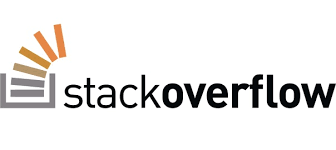


# Analyzing Stack Overflow Developer Survey - 2017




###  Dataset Description - Business Understanding

Every year, Stack Overflow conducts a massive survey of people on the site, covering all sorts of information like programming languages, salary, code style and various other information. This year, they amassed more than 64,000 responses fielded from 213 countries.

Data
The data is made up of two files:

survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer
survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name
m
Acknowledgements
Data is directly taken from StackOverflow and licensed under the ODbL license.

#### Questions of Interest, Data Understanding
Which Programming languages are most favored by Indian Programmers?
Which Programming languages are most desriable in India?
How does work place programming language influence people interest for learning the programming languages of their choice?

##  Which Programming languages are most favored by Indian Programmers?

In [1]:
# get the libraries
import numpy as np
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")



## Gather: get the dataset


In [2]:
df = pd.read_csv('survey_results_public.csv')

In [3]:
3df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Assess the dataset

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 154 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Respondent                        int64  
 1   Professional                      object 
 2   ProgramHobby                      object 
 3   Country                           object 
 4   University                        object 
 5   EmploymentStatus                  object 
 6   FormalEducation                   object 
 7   MajorUndergrad                    object 
 8   HomeRemote                        object 
 9   CompanySize                       object 
 10  CompanyType                       object 
 11  YearsProgram                      object 
 12  YearsCodedJob                     object 
 13  YearsCodedJobPast                 object 
 14  DeveloperType                     object 
 15  WebDeveloperType                  object 
 16  MobileDeveloperType               objec

# Data set is quite clean so skipping clean step

### Part 1. Which programming languages have been mostly used for working in India?

# Prepare the data for the question
###  Analyze the dataset for the above question

In [8]:
def get_country_data(df, column_filter, country, columns):
    ''' 
    df original dataframe
    column_filter filter by column
    country name of country to filter by
    columns to filter on
    returns final dataframe
    '''
    
    copy_df = df
    
    for column in columns: 
        # drop rows where the columns have missing value for the given country
        copy_df = copy_df[copy_df[column_filter] == country].dropna(subset=[column])
        
    return copy_df

# create dataframe for India 
india_df = get_country_data(df, 'Country', 'India', ['HaveWorkedLanguage', 'WantWorkLanguage'])

In [10]:
india_df['HaveWorkedLanguage'].head()

26     Java; JavaScript; Objective-C; Python; Swift
61                              C#; JavaScript; SQL
66                             C++; C#; Objective-C
94                                       C; C#; SQL
107                                       C; Python
Name: HaveWorkedLanguage, dtype: object

### Note: The column contains list of programming languages as separated by semi-colon, so we need to split the columns into series and 

In [11]:

def extract_data_into_columns(df, column):
    ''' 
    df  original dataframe 
    column the column to split
    return the splitted column
    '''
    
    copy_df = df
    column_series = copy_df[column].apply(lambda x: x.split(';'))
    
    return column_series

# Splitting the Data Frame by column into a Series. 
worked_language = extract_data_into_columns(india_df, 'HaveWorkedLanguage')
wanted_language = extract_data_into_columns(india_df, 'WantWorkLanguage')

In [12]:
worked_language

26       [Java,  JavaScript,  Objective-C,  Python,  Sw...
61                                 [C#,  JavaScript,  SQL]
66                                [C++,  C#,  Objective-C]
94                                          [C,  C#,  SQL]
107                                           [C,  Python]
                               ...                        
51339                             [JavaScript,  PHP,  SQL]
51340                                             [Python]
51343       [C,  C++,  C#,  Java,  JavaScript,  PHP,  SQL]
51347                            [C,  Java,  PHP,  Python]
51361                                            [C,  PHP]
Name: HaveWorkedLanguage, Length: 2548, dtype: object

In [13]:
wanted_language

26       [Go,  Java,  JavaScript,  R,  Swift]
61                       [Java,  Objective-C]
66                        [C++,  C#,  Python]
94                           [JavaScript,  R]
107       [C#,  Common Lisp,  R,  Rust,  SQL]
                         ...                 
51339                         [Perl,  Python]
51340                        [Python,  Scala]
51343              [Java,  Objective-C,  SQL]
51347         [C++,  JavaScript,  Ruby,  SQL]
51361                               [C,  PHP]
Name: WantWorkLanguage, Length: 2548, dtype: object

In [14]:

def flattening_list(language_list):
    ''' 
    language list
    '''
    
    objects = []
    
    for row in language_list:
        for obj in row:
            objects.append(obj.strip())
            
    return objects

# flattening the list of languages
list_worked_languages = flattening_list(worked_language)
list_wanted_languages = flattening_list(wanted_language)

In [15]:
list_wanted_languages

['Go',
 'Java',
 'JavaScript',
 'R',
 'Swift',
 'Java',
 'Objective-C',
 'C++',
 'C#',
 'Python',
 'JavaScript',
 'R',
 'C#',
 'Common Lisp',
 'R',
 'Rust',
 'SQL',
 'Python',
 'Scala',
 'Dart',
 'Go',
 'Groovy',
 'Java',
 'Python',
 'R',
 'SQL',
 'Assembly',
 'C',
 'C++',
 'C#',
 'CoffeeScript',
 'Elixir',
 'Go',
 'JavaScript',
 'PHP',
 'Python',
 'R',
 'Ruby',
 'Scala',
 'SQL',
 'TypeScript',
 'Java',
 'JavaScript',
 'Perl',
 'Python',
 'C#',
 'JavaScript',
 'SQL',
 'TypeScript',
 'Assembly',
 'C#',
 'CoffeeScript',
 'Common Lisp',
 'Clojure',
 'Dart',
 'Elixir',
 'Erlang',
 'F#',
 'Go',
 'Groovy',
 'Hack',
 'Haskell',
 'Julia',
 'Lua',
 'Matlab',
 'Objective-C',
 'Perl',
 'R',
 'Ruby',
 'Rust',
 'Scala',
 'Smalltalk',
 'SQL',
 'Swift',
 'TypeScript',
 'VB.NET',
 'VBA',
 'Visual Basic 6',
 'Elixir',
 'JavaScript',
 'Python',
 'R',
 'Rust',
 'C#',
 'Go',
 'Java',
 'JavaScript',
 'R',
 'SQL',
 'TypeScript',
 'C#',
 'JavaScript',
 'PHP',
 'SQL',
 'JavaScript',
 'R',
 'Ruby',
 'Swift',
 

In [16]:
list_worked_languages

['Java',
 'JavaScript',
 'Objective-C',
 'Python',
 'Swift',
 'C#',
 'JavaScript',
 'SQL',
 'C++',
 'C#',
 'Objective-C',
 'C',
 'C#',
 'SQL',
 'C',
 'Python',
 'Java',
 'SQL',
 'C++',
 'Java',
 'JavaScript',
 'Matlab',
 'Objective-C',
 'Python',
 'SQL',
 'C',
 'Java',
 'JavaScript',
 'PHP',
 'Python',
 'Java',
 'SQL',
 'C#',
 'JavaScript',
 'SQL',
 'VBA',
 'C',
 'C++',
 'Java',
 'JavaScript',
 'PHP',
 'Python',
 'SQL',
 'Java',
 'JavaScript',
 'PHP',
 'Python',
 'C#',
 'Java',
 'JavaScript',
 'SQL',
 'C#',
 'JavaScript',
 'PHP',
 'SQL',
 'C',
 'C++',
 'JavaScript',
 'Python',
 'Assembly',
 'C',
 'C++',
 'JavaScript',
 'Matlab',
 'Python',
 'C++',
 'JavaScript',
 'Python',
 'C#',
 'JavaScript',
 'PHP',
 'JavaScript',
 'C#',
 'JavaScript',
 'Java',
 'JavaScript',
 'Scala',
 'PHP',
 'Python',
 'Java',
 'JavaScript',
 'Matlab',
 'R',
 'SQL',
 'Go',
 'JavaScript',
 'Python',
 'SQL',
 'TypeScript',
 'Assembly',
 'C',
 'C++',
 'C#',
 'Common Lisp',
 'Go',
 'Haskell',
 'Java',
 'Rust',
 'Java

In [17]:
# analyze by grouping

def groupby_languages(data_list):
    ''' 
    Group by count to a list,
        returns a result dict.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value} for key, value in grouped_list.items()]
    
    return grouped_dict

# Groping a list and creating a dict.
dict_worked_languages = groupby_languages(list_worked_languages)
dict_wanted_languages = groupby_languages(list_wanted_languages)

In [18]:
dict_worked_languages

[{'Programming Language': 'Java', 'Count': 1214},
 {'Programming Language': 'JavaScript', 'Count': 1405},
 {'Programming Language': 'Objective-C', 'Count': 167},
 {'Programming Language': 'Python', 'Count': 654},
 {'Programming Language': 'Swift', 'Count': 127},
 {'Programming Language': 'C#', 'Count': 560},
 {'Programming Language': 'SQL', 'Count': 1211},
 {'Programming Language': 'C++', 'Count': 611},
 {'Programming Language': 'C', 'Count': 718},
 {'Programming Language': 'Matlab', 'Count': 94},
 {'Programming Language': 'PHP', 'Count': 781},
 {'Programming Language': 'VBA', 'Count': 55},
 {'Programming Language': 'Assembly', 'Count': 142},
 {'Programming Language': 'Scala', 'Count': 63},
 {'Programming Language': 'R', 'Count': 89},
 {'Programming Language': 'Go', 'Count': 46},
 {'Programming Language': 'TypeScript', 'Count': 141},
 {'Programming Language': 'Common Lisp', 'Count': 11},
 {'Programming Language': 'Haskell', 'Count': 17},
 {'Programming Language': 'Rust', 'Count': 8},
 

In [19]:
dict_wanted_languages

[{'Programming Language': 'Go', 'Count': 356},
 {'Programming Language': 'Java', 'Count': 1045},
 {'Programming Language': 'JavaScript', 'Count': 1275},
 {'Programming Language': 'R', 'Count': 286},
 {'Programming Language': 'Swift', 'Count': 357},
 {'Programming Language': 'Objective-C', 'Count': 200},
 {'Programming Language': 'C++', 'Count': 492},
 {'Programming Language': 'C#', 'Count': 497},
 {'Programming Language': 'Python', 'Count': 1100},
 {'Programming Language': 'Common Lisp', 'Count': 45},
 {'Programming Language': 'Rust', 'Count': 87},
 {'Programming Language': 'SQL', 'Count': 893},
 {'Programming Language': 'Scala', 'Count': 281},
 {'Programming Language': 'Dart', 'Count': 43},
 {'Programming Language': 'Groovy', 'Count': 82},
 {'Programming Language': 'Assembly', 'Count': 148},
 {'Programming Language': 'C', 'Count': 381},
 {'Programming Language': 'CoffeeScript', 'Count': 106},
 {'Programming Language': 'Elixir', 'Count': 54},
 {'Programming Language': 'PHP', 'Count': 5

In [21]:
# create the dataframe for the above two dictionaries
worked_df = pd.DataFrame(dict_worked_languages)
worked_df.head()

,Programming Language,Count
0,Java,1214
1,JavaScript,1405
2,Objective-C,167
3,Python,654
4,Swift,127


In [22]:
wanted_df = pd.DataFrame(dict_wanted_languages)
wanted_df.head()

,Programming Language,Count
0,Go,356
1,Java,1045
2,JavaScript,1275
3,R,286
4,Swift,357


In [30]:

# Calculating the percentage

worked_df['Percentage'] = (worked_df['Count'] / worked_df['Count'].sum()) *100


In [31]:
worked_df

,Programming Language,Count,Percentage
0,Java,1214,14.005538
1,JavaScript,1405,16.209045
2,Objective-C,167,1.926627
3,Python,654,7.544993
4,Swift,127,1.465159
5,C#,560,6.460545
6,SQL,1211,13.970928
7,C++,611,7.048916
8,C,718,8.283341
9,Matlab,94,1.084449


In [32]:
wanted_df['Percentage'] = (wanted_df['Count'] / wanted_df['Count'].sum()) *100

In [33]:
wanted_df

,Programming Language,Count,Percentage
0,Go,356,3.657284
1,Java,1045,10.735566
2,JavaScript,1275,13.098418
3,R,286,2.938155
4,Swift,357,3.667557
5,Objective-C,200,2.054654
6,C++,492,5.054448
7,C#,497,5.105815
8,Python,1100,11.300596
9,Common Lisp,45,0.462297


In [34]:
# find top 10 languages
top_10_worked_languages = worked_df.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()

In [35]:
top_10_wanted_languages = wanted_df.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()

In [37]:
# find if the languages are in the top-10 list
worked = worked_df[worked_df['Programming Language'].isin(top_10_worked_languages)]
wanted = wanted_df[wanted_df['Programming Language'].isin(top_10_wanted_languages)]



In [38]:
worked.head()

,Programming Language,Count,Percentage
0,Java,1214,14.005538
1,JavaScript,1405,16.209045
2,Objective-C,167,1.926627
3,Python,654,7.544993
5,C#,560,6.460545


In [39]:
wanted.head()

,Programming Language,Count,Percentage
0,Go,356,3.657284
1,Java,1045,10.735566
2,JavaScript,1275,13.098418
4,Swift,357,3.667557
6,C++,492,5.054448


# Visualize the analysis

No handles with labels found to put in legend.


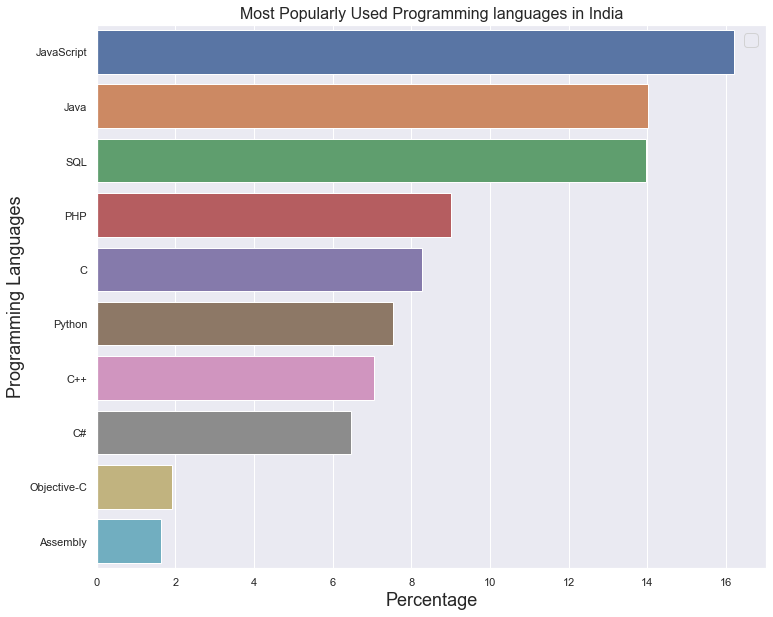

In [43]:
# Plotting the most popular programming languages.

plt.figure(figsize=(12,10))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            data = worked.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 18)
plt.ylabel("Programming Languages", fontsize = 18)
plt.legend(fontsize='x-large', title_fontsize='50')
plt.title('Most Popularly Used Programming languages in India', size = 16)
plt.show()

### Observation
*  Most Popular Programming languages in India are Javascript, Java , SQL etc. 

## Part 2: Which Programming languages are most desriable in India?

No handles with labels found to put in legend.


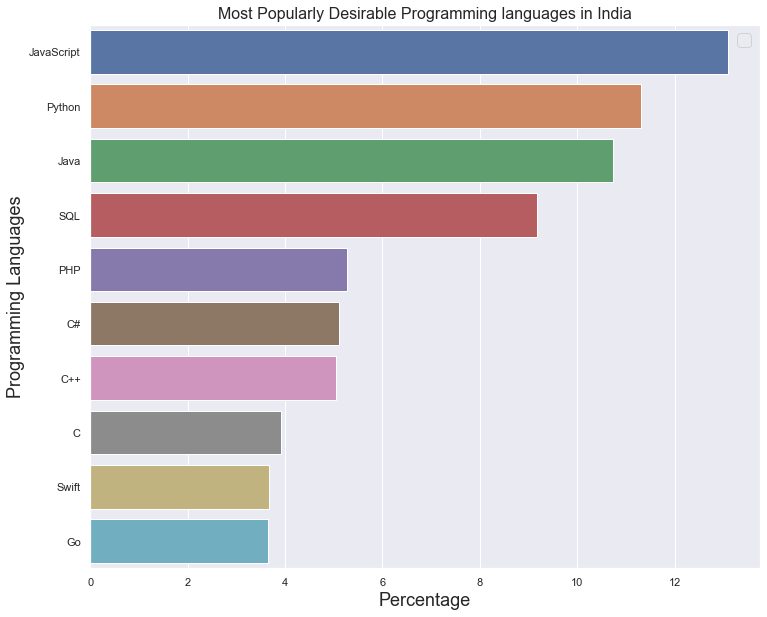

In [44]:
plt.figure(figsize=(12,10))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            data = wanted.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 18)
plt.ylabel("Programming Languages", fontsize = 18)
plt.legend(fontsize='x-large', title_fontsize='50')
plt.title('Most Popularly Desirable Programming languages in India', size = 16)
plt.show()

### Observation:
* Python is clearly gaining grounds when it comes to popularity. While Javascript still remains the most popularly used and desriable.

## Part 3. How does work place programming language influence people interest for learning the programming languages of their choice?

* clearly Python seems like such a case where we people using at work also tend touse it more for work.

In [47]:
rows = []
for items in list(zip(worked_language, wanted_language)):
    for i in items[0]:
        rows.append({
            'Working_Language': i, 
            'Wanted_Language': Counter(items[0])
        })
        
language_influence = pd.DataFrame(rows).groupby('Working_Language').agg({'Wanted_Language': 'sum'}).reset_index()
language_influence

,Working_Language,Wanted_Language
0,C,"{'Assembly': 97, ' C': 97, ' C++': 64, ' JavaS..."
1,C#,"{'C++': 26, ' C#': 211, ' Objective-C': 27, 'C..."
2,C++,"{'C': 392, ' C++': 477, ' Java': 282, ' JavaSc..."
3,Clojure,"{'C': 3, ' C#': 2, ' Clojure': 5, ' Java': 3, ..."
4,CoffeeScript,"{'Assembly': 1, ' C#': 4, ' CoffeeScript': 10,..."
...,...,...
57,Scala,"{'Scala': 3, ' SQL': 1, ' VB.NET': 1, ' VBA': 1}"
58,Swift,{'Swift': 6}
59,TypeScript,{'TypeScript': 1}
60,VB.NET,{'VB.NET': 2}


In [50]:
# create a structure for both languages

for row in language_influence['Working_Language']:
    language_influence[row] = 0

for index, row in language_influence.iterrows():
    total = sum([value for key, value in dict(row['Wanted_Language']).items()])
    for key, value in dict(row['Wanted_Language']).items():
         language_influence[key].loc[index] = (value / total)



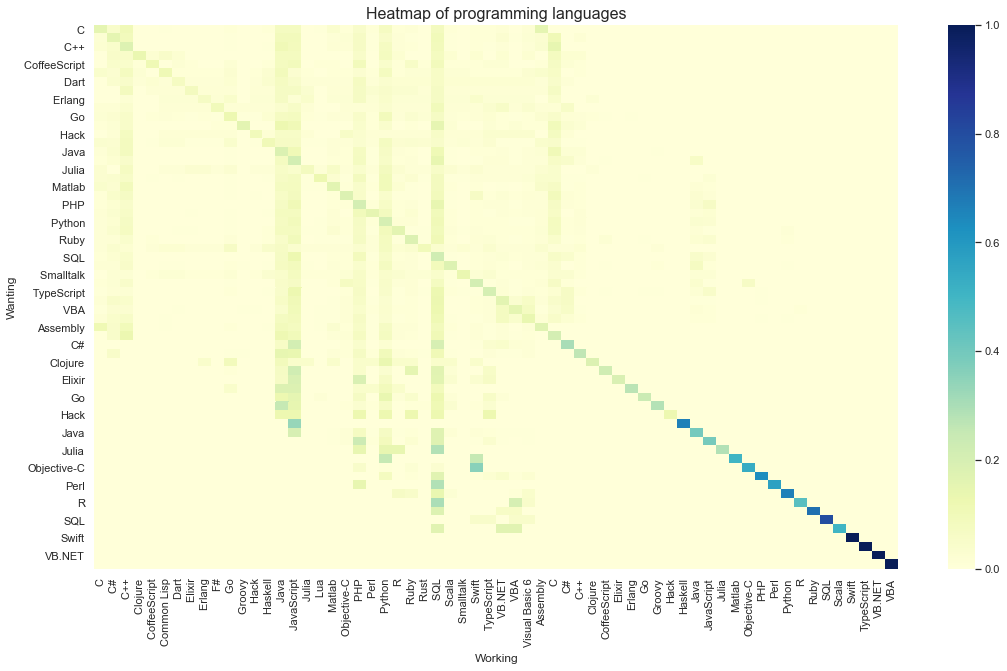

In [54]:
heatmap_structure = language_influence.drop('Wanted_Language', axis=1)\
                                        .set_index('Working_Language')

plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_structure, cmap="YlGnBu")
plt.title('Heatmap of programming languages', size = 16)
plt.xlabel('Working')
plt.ylabel('Wanting')
plt.show()


### Observation:
* People using a work language tend to use the same language for learning. This is evident with strong relation with people using python for learning at home when using pyhton at work

## References
* DataSet : https://www.kaggle.com/stackoverflow/so-survey-2017
* Medium: https://capricioussunny.medium.com/analyzing-kaggle-dataset-stack-overflow-developer-survey-for-indian-programmers-d8465777359a?sk=08580ea0a0148c90730df5e49f024e95
* Github: https://github.com/sunnyanand17/Write-a-data-science-blog-post.git